In [9]:
# -*- coding: utf-8 -*-
# cybos related
import sys
import os
proj_dir = "C:\\Users\\sh\\Documents\\devbox\\github\\auto_invest"
sys.path.append(proj_dir)
from src.utils.database import dbMeta

# math
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

# visualization with Korean
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_loc = os.path.join(proj_dir, "asset\\human_myeongjo.ttf")
font_name = fm.FontProperties(fname=font_loc).get_name()
font = {
    'family': font_name,
    'weight': 'bold',
}
mpl.rc('font', **font)
mpl.rc('text', color='white')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
sql = """SELECT 
	*
FROM krx_timeconclude_history
WHERE date(time) = (
    SELECT 
        max(date(time))
    FROM krx_timeconclude_history
)
;
"""
engine = dbMeta.get_mysql_engine()
snapshot = pd.read_sql(sql, engine)

sql = """SELECT 
	*
FROM dim_krx_stock
;
"""
cd_dim = dbMeta.get_krx_stock_list()

C:\Users\sh\Anaconda3\lib\site-packages\pymysql\cursors.py:166: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [11]:
from sklearn.preprocessing import StandardScaler


def normalize_series(series):
    values = series.values
    values = values.reshape((len(values), 1))
    scaler = StandardScaler()
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    return normalized


def get_time_derivative(plotter, col):
    if plotter.index.names[0] == 'time':
        plotter['dt'] = pd.Series(data=plotter.index.tolist(), index=plotter.index.tolist()).diff().apply(lambda x: x.total_seconds())
    else:
        plotter['dt'] = plotter['time'].diff().apply(lambda x: x.total_seconds())
    
    plotter['col_dt'] = plotter[col].diff()
    c_name = 'deriv_%s' % col
    plotter = plotter.fillna(10e-9)
    plotter[c_name] = plotter['col_dt'] / plotter['dt']
    plotter.drop(['dt', 'col_dt'], inplace=True, errors='ignore')
    return (plotter, c_name)

In [16]:
import random as rnd

plt.close('all')

# random stock view
# r = rnd.randint(0, len(cd_dim))
# code = cd_dim.ix[[r], ['종목명', '종목코드']] 
# cd_nm = code.iloc[0]['종목명']
# cd = code.iloc[0]['종목코드']

cd_nm = '일동홀딩스'
cd = 230
plotter = snapshot[snapshot.code == cd]
plotter.drop(['seq', 'code', 'Debi', 'Dungrak'], axis=1, inplace=True, errors='ignore')
plotter = plotter.set_index('time')
plotter.describe()

C:\Users\sh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,amount,buyprice,negoprice,sellprice
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [14]:
plotter.head(10)

,amount,buyprice,negoprice,sellprice
time,,,,


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by StandardScaler.

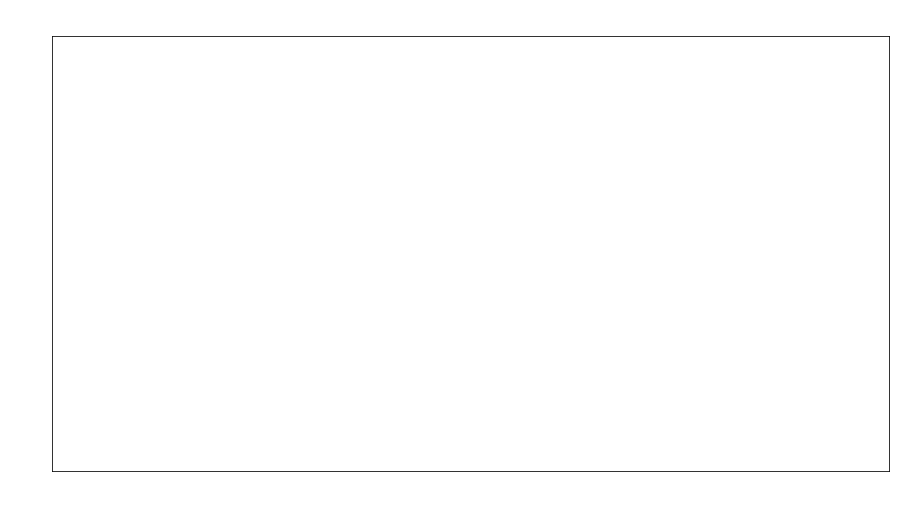

In [15]:
target = 'sellprice'
predictors = [c for c in plotter.columns.values if c not in (target, 'time')]

for i, c in enumerate(predictors):
    fig, ax = plt.subplots(figsize=(15, 8))
    title = r"%s vs. %s" % (target, c)
    ax.set_title(title, fontsize=30)
    ax.set_xlabel('time')
    ax.set_ylabel('normalized values')
    ax.tick_params(axis='both', labelsize=15, colors='white')
    for xs in [ax.xaxis.label, ax.yaxis.label]:
        xs.set_color('white')
        xs.set_fontsize(15)

    plotter, deriv_col_name = get_time_derivative(plotter, c)
    plotter[c] = normalize_series(plotter[c])
    plotter[target] = normalize_series(plotter[target])
    plotter[deriv_col_name] = normalize_series(plotter[deriv_col_name])
    ax.plot(plotter[c], 'y--', label=c)
    ax.plot(plotter[target], 'r:', label=target)
    ax.plot(plotter[deriv_col_name], 'b', label=deriv_col_name)
    """   ADD LEGEND   """
    legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    legend.get_frame().set_facecolor('#000000')


plt.show()